In [1]:
#import the data as dataframe
import pandas as pd
df = pd.read_csv('mydata/movie/train.csv', index_col='id')

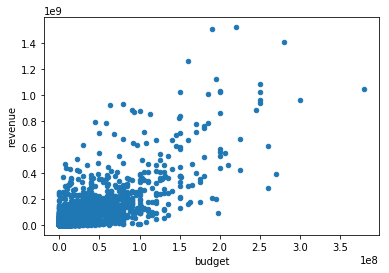

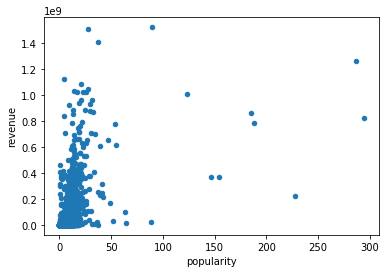

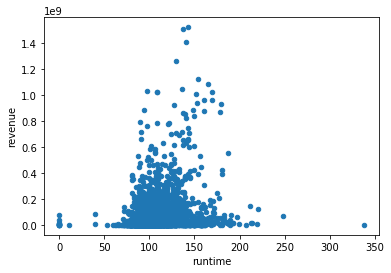

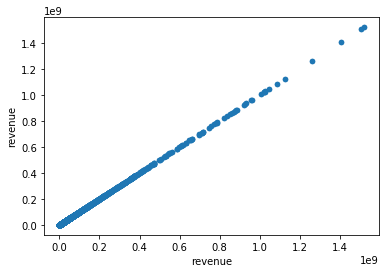

In [3]:
#bivariate analysis of all numeric features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf.head(2)
for column_name in newdf.columns:
    var = column_name
    target = 'revenue'
    data = pd.concat([newdf[target], newdf[var]], axis=1)
    data.plot.scatter(x=var, y=target);

In [4]:
#correlation
import numpy as np
corrmat = newdf.corr()
corrmat

,budget,popularity,runtime,revenue
budget,1.000000,0.342356,0.238373,0.752965
popularity,0.342356,1.000000,0.133690,0.461460
runtime,0.238373,0.133690,1.000000,0.216380
revenue,0.752965,0.461460,0.216380,1.000000


C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


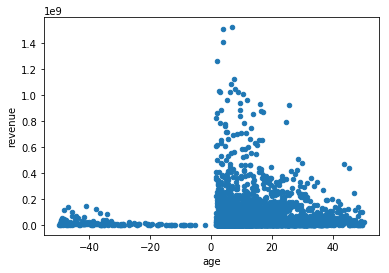

In [5]:
#transform date into numeric feature age
import datetime
from datetime import date
format_str = '%m/%d/%y' #format
newdf.loc[:,'age'] = [((date.today() - datetime.datetime.strptime(element, format_str).date()).days / 365) for element in df['release_date']]
data = pd.concat([newdf[target], newdf['age']], axis=1)
data.plot.scatter(x='age', y=target);

In [6]:
newdf.describe()
#there are negative ages? look into this

,budget,popularity,runtime,revenue,age
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03,3000.000000
mean,2.253133e+07,8.463274,107.856571,6.672585e+07,14.059587
std,3.702609e+07,12.104000,22.086434,1.375323e+08,15.489800
min,0.000000e+00,0.000001,0.000000,1.000000e+00,-49.734247
25%,0.000000e+00,4.018053,94.000000,2.379808e+06,6.467123
50%,8.000000e+06,7.374861,104.000000,1.680707e+07,13.112329
75%,2.900000e+07,10.890983,118.000000,6.891920e+07,23.339041
max,3.800000e+08,294.337037,338.000000,1.519558e+09,50.180822


In [7]:
#Genres
#1) extract a list of all genres (as looked up from the kaggle website)
genres_df = df[['genres', 'revenue']]
genres_df['genres_test'] = genres_df['genres']
genres_df.genres_test = genres_df.genres_test.str.strip('[]')
genres_df.genres_test[genres_df.genres_test.isnull()] = ''
genres_list = pd.Series(list(set(", ".join(genres_df.genres_test.unique().tolist()).split('}, ')))).str.split("'name': '").str[1].str.split("'").str[0].tolist()
genres_list


C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

['Family',
 'Science Fiction',
 'Crime',
 'Drama',
 'TV Movie',
 'Mystery',
 'Western',
 'Adventure',
 'Action',
 'Animation',
 'Thriller',
 'War',
 'Foreign',
 'Music',
 'Comedy',
 'Documentary',
 'Fantasy',
 'Horror',
 'Mystery',
 'History',
 'Action',
 'Romance']

In [8]:
#create boolean feature for each genre
for i, genre in enumerate(genres_list):
    genres_df[genre] = False
    genres_df[genre][genres_df.genres_test.str.contains(genre)] = True
genres_df.head(2)

C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

,genres,revenue,genres_test,Family,Science Fiction,Crime,Drama,TV Movie,Mystery,Western,...,Thriller,War,Foreign,Music,Comedy,Documentary,Fantasy,Horror,History,Romance
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 35, 'name': 'Comedy'}]",12314651,"{'id': 35, 'name': 'Comedy'}",False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",95149435,"{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name...",True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,"[{'id': 18, 'name': 'Drama'}]",13092000,"{'id': 18, 'name': 'Drama'}",False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",16000000,"{'id': 53, 'name': 'Thriller'}, {'id': 18, 'na...",False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
5,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",3923970,"{'id': 28, 'name': 'Action'}, {'id': 53, 'name...",False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",3261638,"{'id': 16, 'name': 'Animation'}, {'id': 12, 'n...",True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",85446075,"{'id': 27, 'name': 'Horror'}, {'id': 53, 'name...",False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
8,"[{'id': 99, 'name': 'Documentary'}]",2586511,"{'id': 99, 'name': 'Documentary'}",False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
9,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",34327391,"{'id': 28, 'name': 'Action'}, {'id': 35, 'name...",True,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False


[['Family', 138897794.86153847], ['Science Fiction', 122367176.31379311], ['Crime', 59491276.81876332], ['Drama', 45406073.93272371], ['TV Movie', 42000000.0], ['Mystery', 59633963.755555555], ['Western', 51370635.34883721], ['Adventure', 175809498.856492], ['Action', 111043446.51417004], ['Animation', 147734092.26950353], ['Thriller', 68336641.40177439], ['War', 49915868.09], ['Foreign', 1874197.6129032257], ['Music', 42870897.68], ['Comedy', 60875742.9192607], ['Documentary', 4638009.126436782], ['Fantasy', 147965932.8448276], ['Horror', 52709070.823920265], ['Mystery', 59633963.755555555], ['History', 38413231.93181818], ['Action', 111043446.51417004], ['Romance', 52705007.38353765]]


([<matplotlib.axis.YTick at 0x50d3a58>,
 <a list of 22 Text yticklabel objects>)

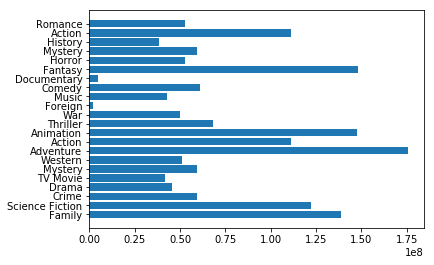

In [10]:
#create a bar chart with the average revenue per genre
import numpy as np                                                               
import matplotlib.pyplot as plt

avg = []
for i, genre in enumerate(genres_list):
    avg.append([genre, genres_df.loc[genres_df[genre]==True].revenue.mean()])
print(avg)

labels, ys = zip(*avg)
xs = np.arange(len(labels)) 

fig, ax = plt.subplots()
ax.barh(xs, ys, align='center')

plt.yticks(xs, labels)